## <center> Binary Classiﬁcation <center>

In [3]:
# imports 
import pandas as pd 
from sklearn.model_selection import train_test_split
from functions import removeNonAlphanumeric, toNumeric, target_variable_exploration,handleMissing, plot_categ, plot_numeric
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt


## 1).  Chronic Kidney Disease: 

In [100]:
# Load data 
data = pd.read_csv(r'./data/kidney_disease.csv')
# Split it to train and test
train_data, test_data = train_test_split(data) 
train_data = train_data.set_index('id')

In [48]:

train_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
386,46.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,43,5700,6.5,no,no,no,good,no,no,notckd
119,60.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,140.0,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,137.0,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
91,56.0,70.0,1.015,4.0,1.0,abnormal,normal,notpresent,notpresent,210.0,...,52,12500,5.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,34.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,121.0,...,52,9200,6.3,no,no,no,good,no,no,notckd
378,71.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,NaN,...,42,7700,5.5,no,no,no,good,no,no,notckd
341,63.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,130.0,...,41,7300,4.7,no,no,no,good,no,no,notckd


In [4]:
# data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 144 to 120
Data columns (total 25 columns):
age               292 non-null float64
bp                295 non-null float64
sg                265 non-null float64
al                265 non-null float64
su                263 non-null float64
rbc               185 non-null object
pc                251 non-null object
pcc               298 non-null object
ba                298 non-null object
bgr               269 non-null float64
bu                283 non-null float64
sc                285 non-null float64
sod               232 non-null float64
pot               232 non-null float64
hemo              260 non-null float64
pcv               245 non-null object
wc                219 non-null object
rc                201 non-null object
htn               300 non-null object
dm                300 non-null object
cad               300 non-null object
appet             300 non-null object
pe                300 non-null object
ane     

In [5]:
#Get the shape of the data (the number of rows & columns)
print(train_data.shape)
# Statistical description of training data set
print(train_data.describe())

(300, 25)
              age          bp          sg          al          su         bgr  \
count  292.000000  295.000000  265.000000  265.000000  263.000000  269.000000   
mean    51.390411   76.644068    1.017585    0.913208    0.422053  144.884758   
std     17.141968   12.747899    0.005791    1.280690    1.063180   75.213612   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     41.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     54.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.000000   80.000000    1.020000    2.000000    0.000000  162.000000   
max     90.000000  140.000000    1.025000    4.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo  
count  283.000000  285.000000  232.000000  232.000000  260.000000  
mean    55.860777    2.889474  138.293103    4.686638   12.582308  
std     50.029586    4.579474    6.813556    3.676595   

### Data Cleaning

In [6]:
train_data['cad'].unique()

array(['no', 'yes', '\tno'], dtype=object)

There is noise in data. As we can see, 'no' and '\tno' are considered as two modalities. 

In [101]:
# Remove non alphanumeric 
train_data = removeNonAlphanumeric(train_data)
train_data = toNumeric(train_data)


In [8]:
train_data['cad'].unique()

array(['no', 'yes'], dtype=object)

In [102]:
# Get columns with null values
print("Columns with null values before imputing")
print(train_data.columns[train_data.isna().any()].tolist())
# Handle missing values
df,imput_dict = handleMissing(train_data, "most_frequent")
print("Columns with null values after imputing")
print(train_data.columns[train_data.isna().any()].tolist())

Columns with null values before imputing
['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
For non numeric columns, most frequent strategy is used
Columns with null values after imputing
[]


### Data visualization

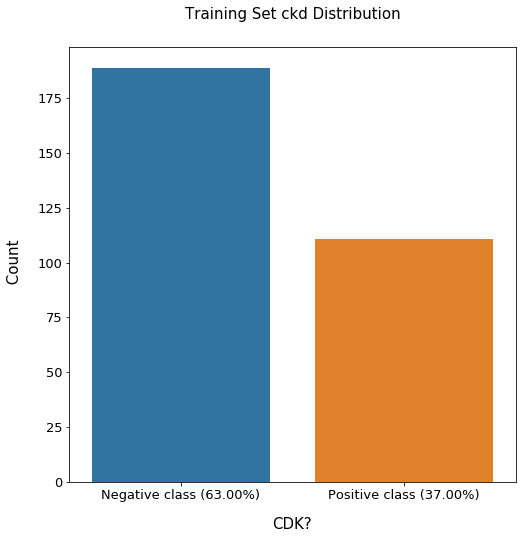

In [19]:
### Target variable exploration

target_variable_exploration(train_data, "classification", 'CDK?', ' Count', 'Training Set ckd Distribution')

The classes are slithly umbalanced. This should not cause any problem.???

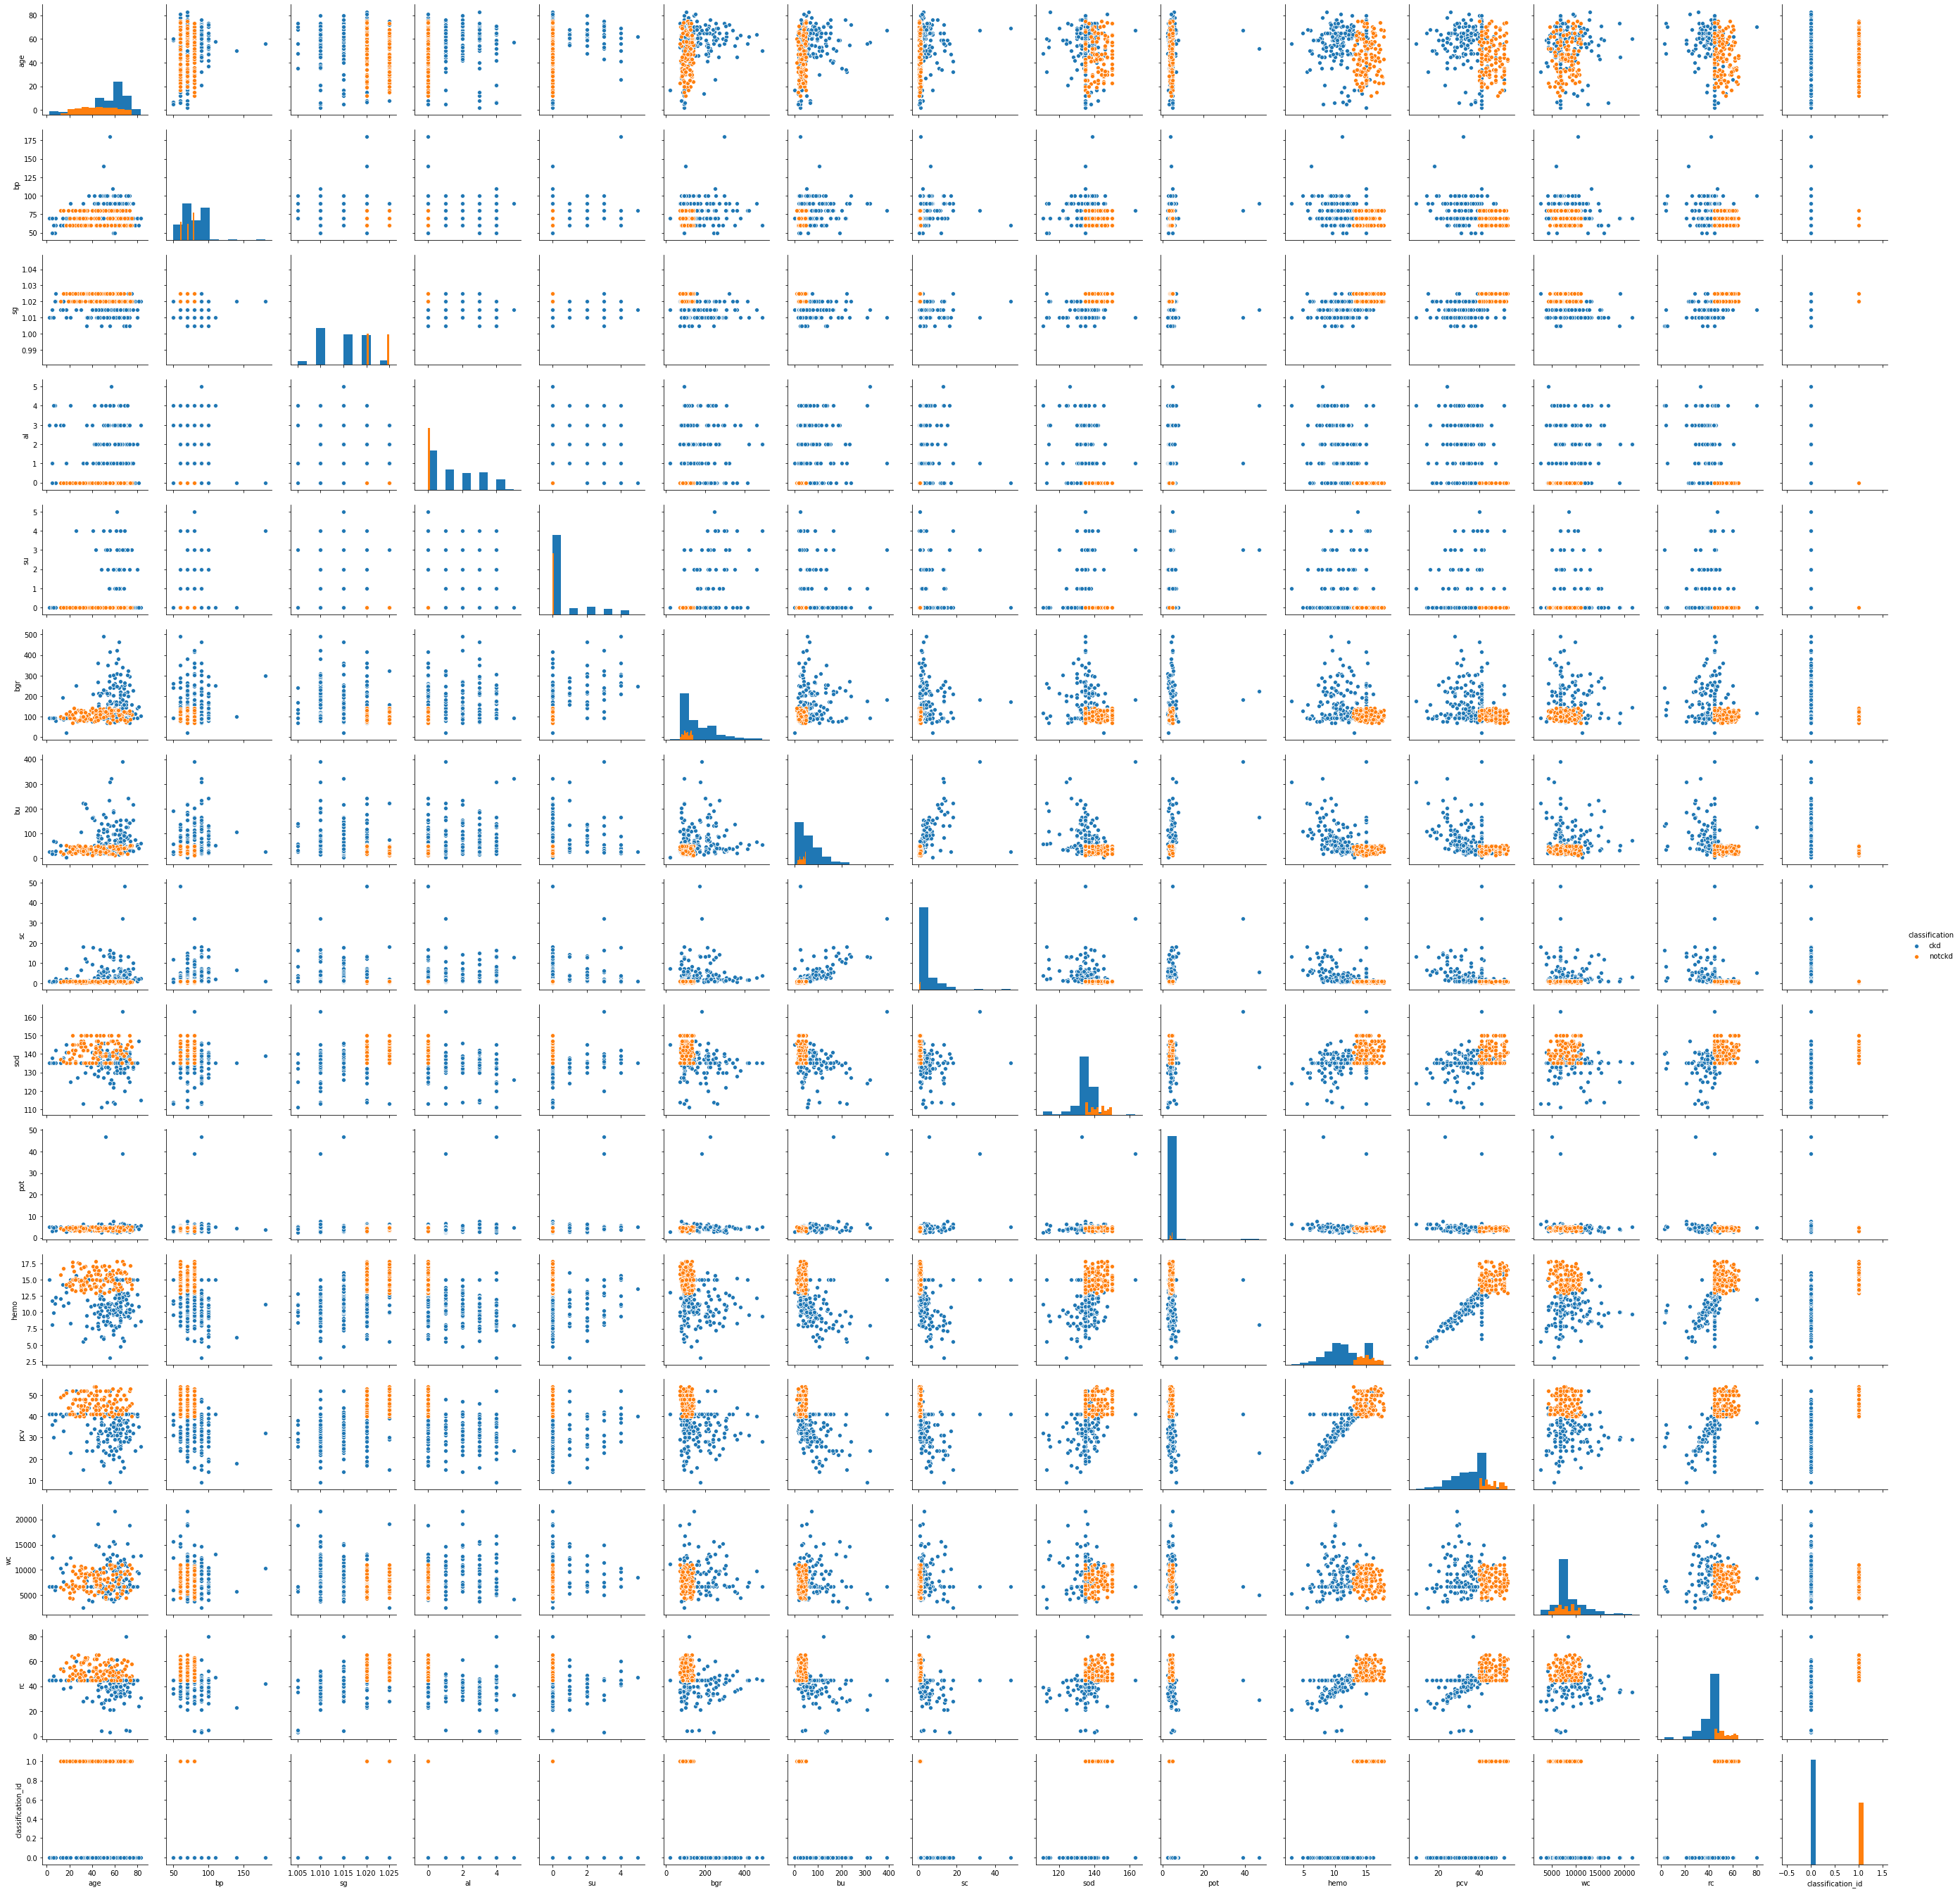

In [24]:
sns.pairplot(train_data, diag_kind ='hist' , hue="classification")
plt.show()

### Analyse :
    - Pour les variable "RC", "WC", "pvc", "hemo", "sod", les grands valeurs correspondent à des plus grandes probabilités de non cdk
    - Corrélation lineare entre pvc et hemo"
    _ ba une modalité n'a que des valeurs ckd
    - The histograms of the numeric data show that there are numeric values present in the dataset that consists of few discrete values, e.g. "sg". These features will be transformed later in the data manipulation part from numerical to categorical. 
    - There are some categorical features, where the different categories occur with similar frequency, e.g. for "sg"; and there are feature, where one category is very dominant, e.g. for "su".
    - Some features show a linear relationship with each other, for example "hema" and "pcv". We will study later correlation relationships between variables.
    
    

In [25]:
pwd

'C:\\Users\\akhdi'

In [103]:
def getCategFeat(df, n, target):
    """
    -- n : min modalities for numerical feat
    """
    return [c for c in df.columns if (df[c].dtype == 'O' or df[c].nunique()<n) and c!=target]

In [104]:
categorical_features = getCategFeat(train_data,7,'classification')# To match dataset desciprtion on UCI website, n=7
print("Categorical Features : ",categorical_features)
numerical_features = [c for c in train_data.columns if c not in categorical_features and c!="classification"]
print("Numerical Features : ", numerical_features)

Categorical Features :  ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Numerical Features :  ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


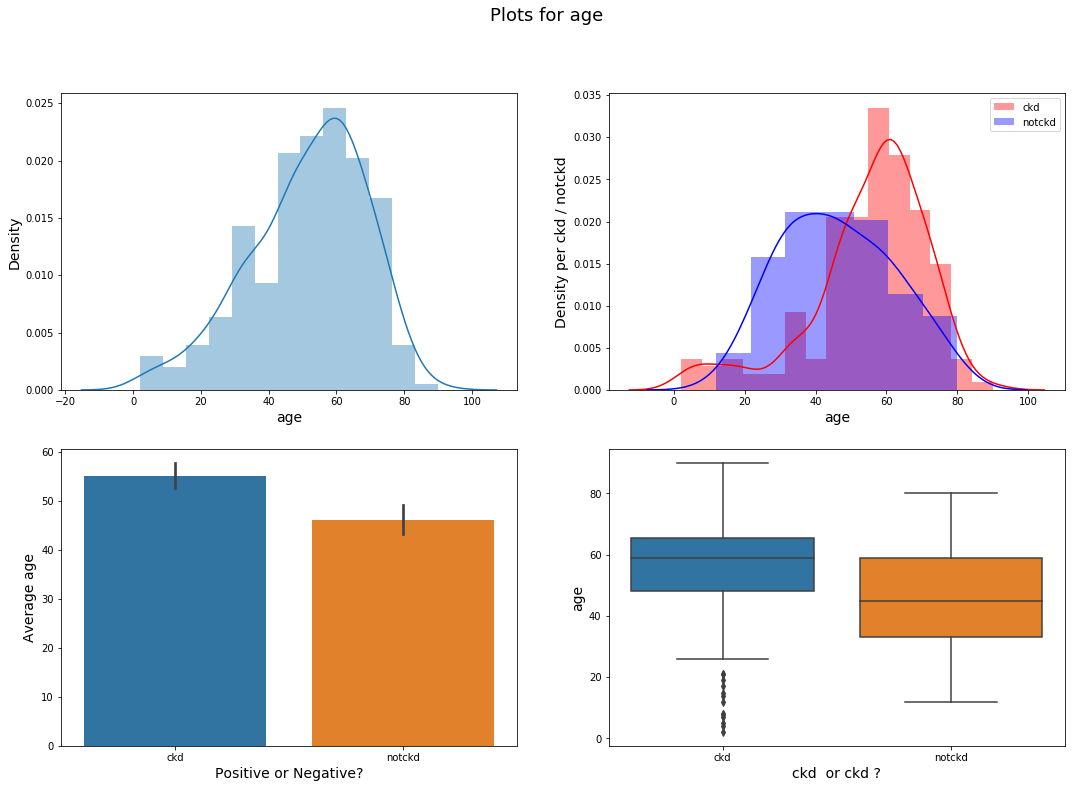

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


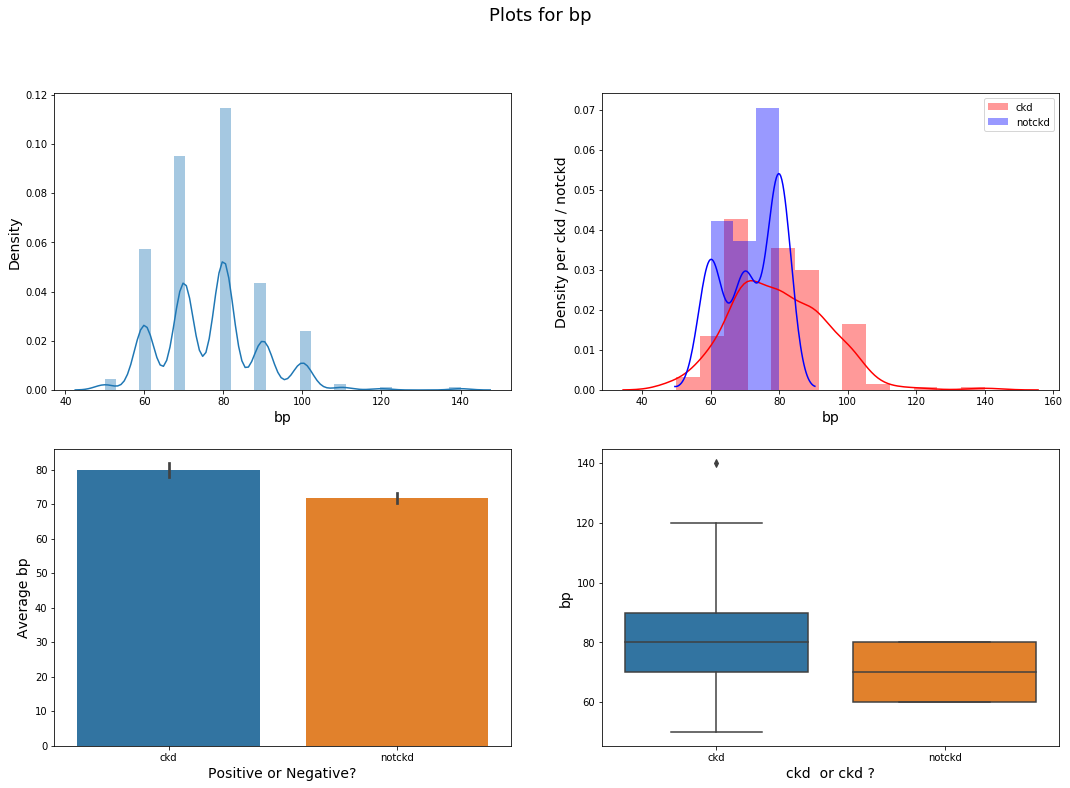

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


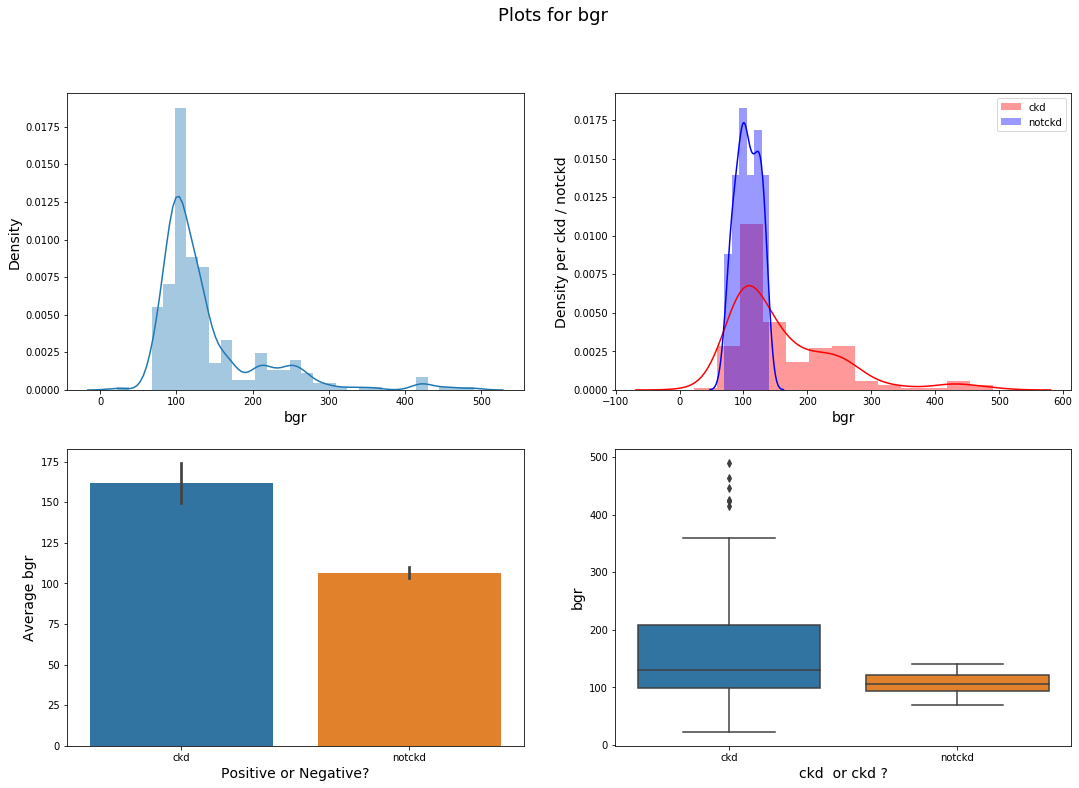

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


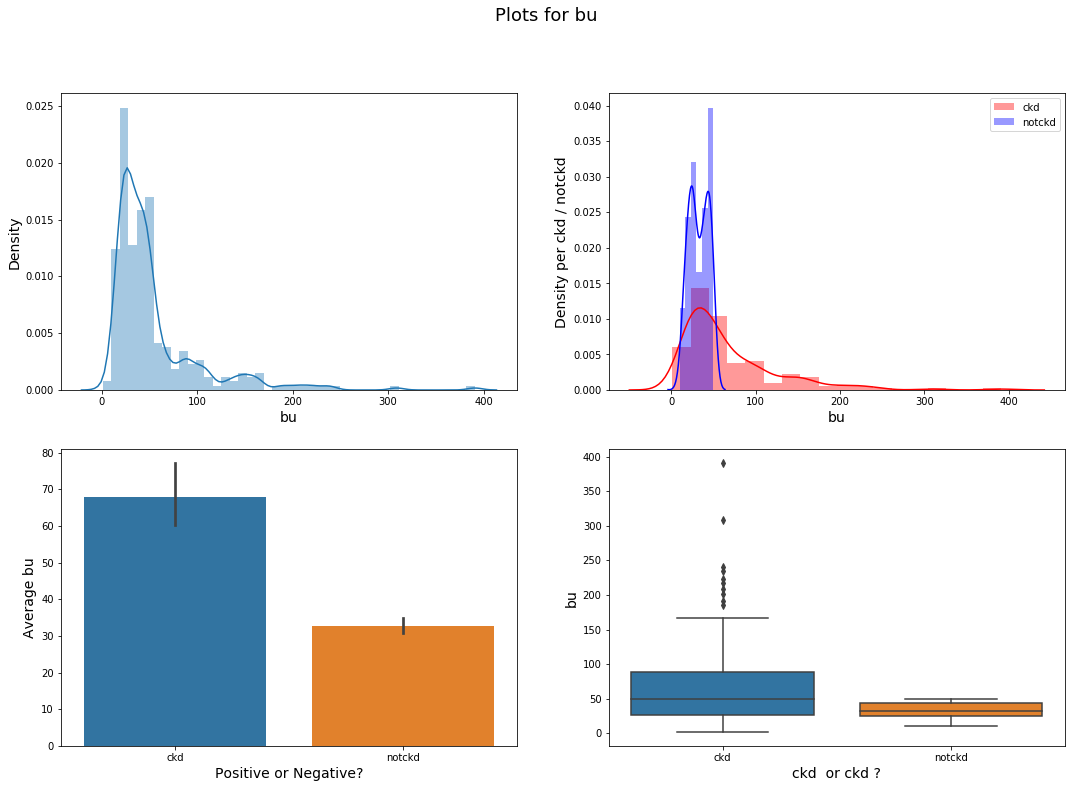

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


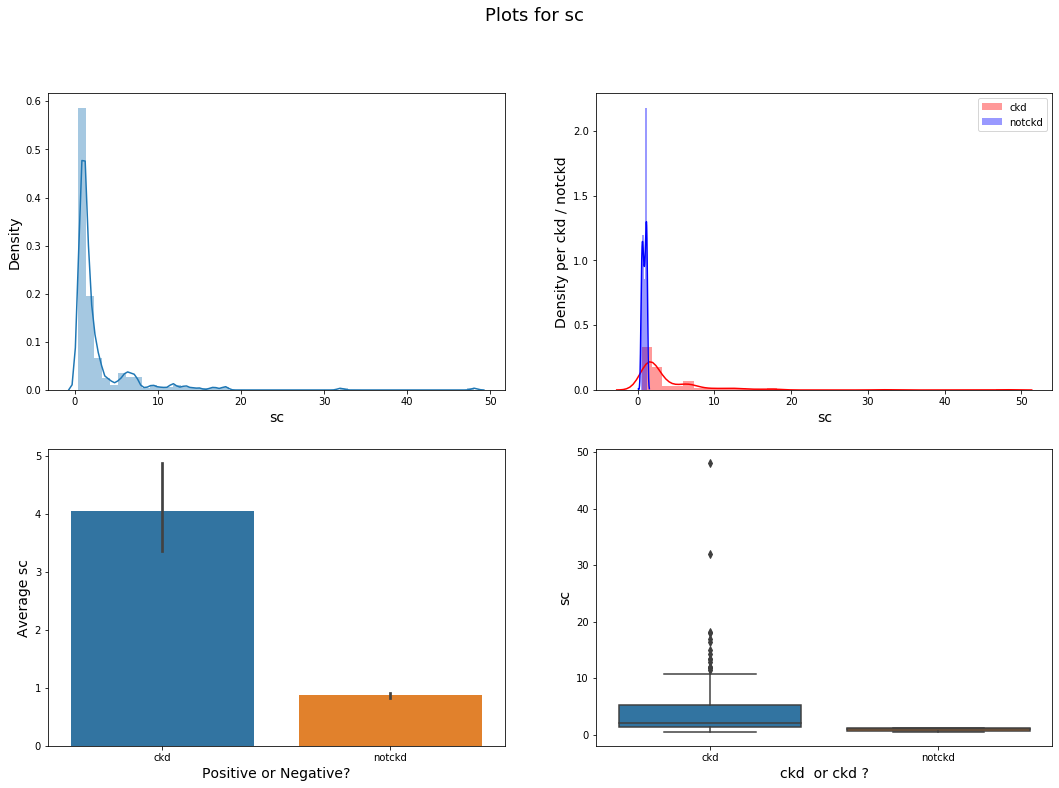

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


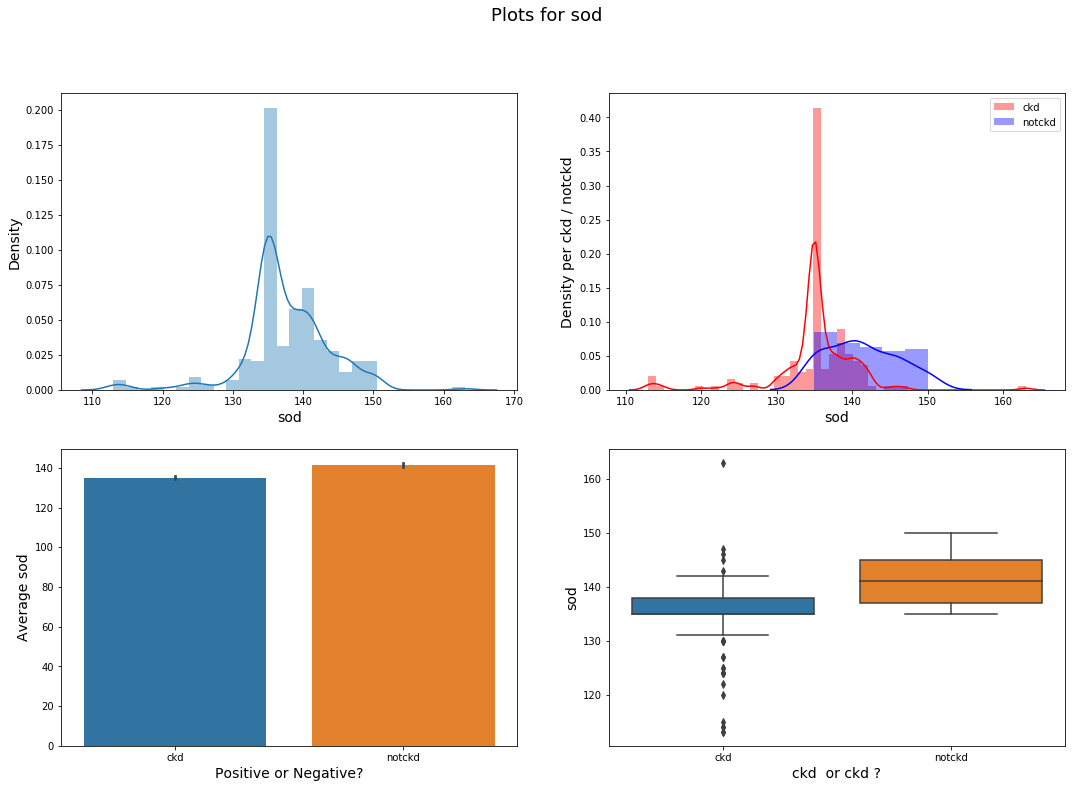

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


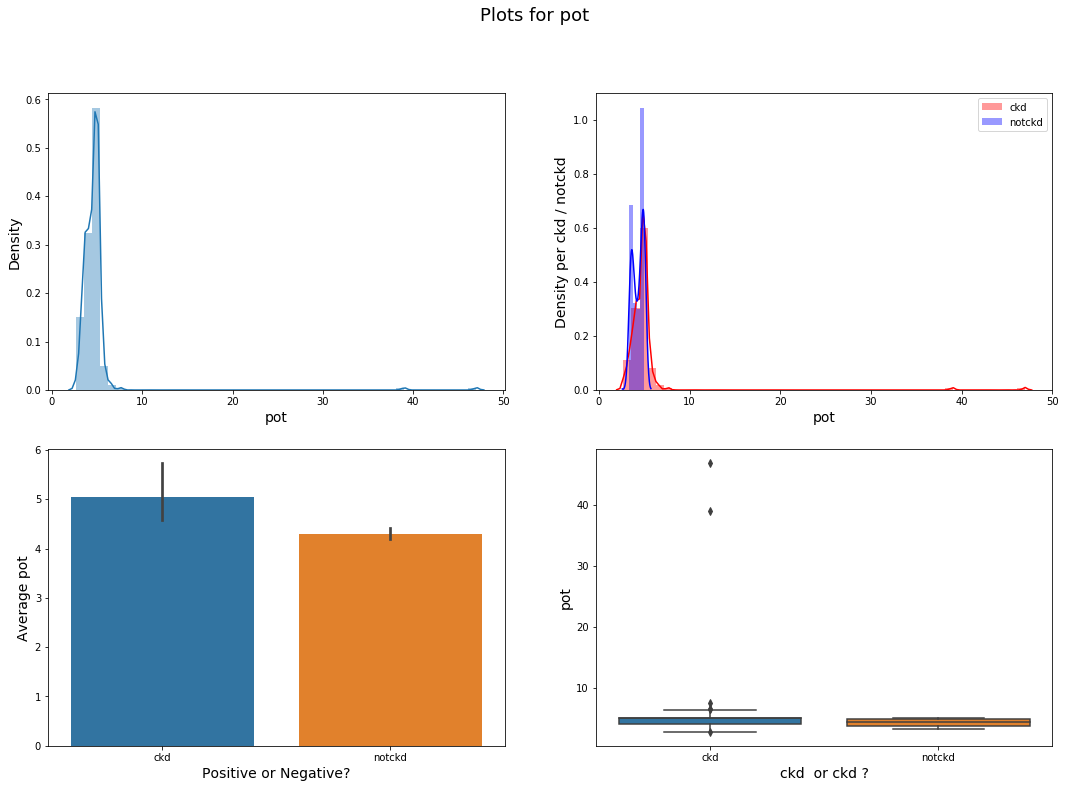

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


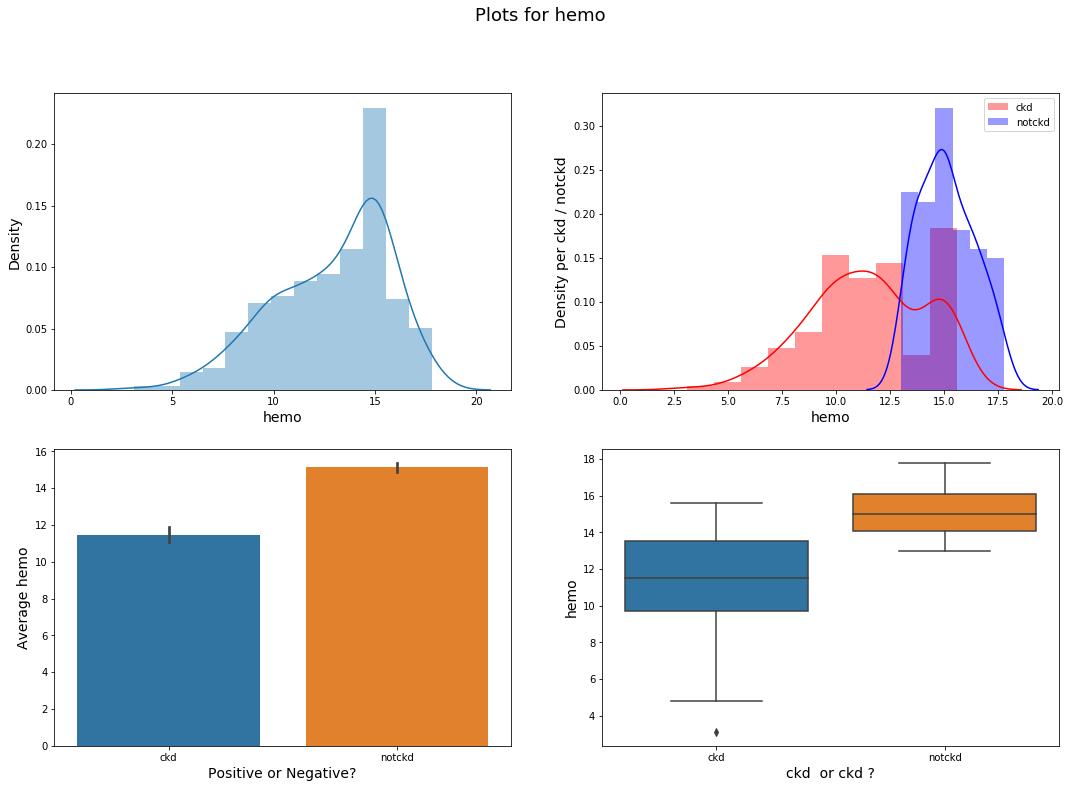

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


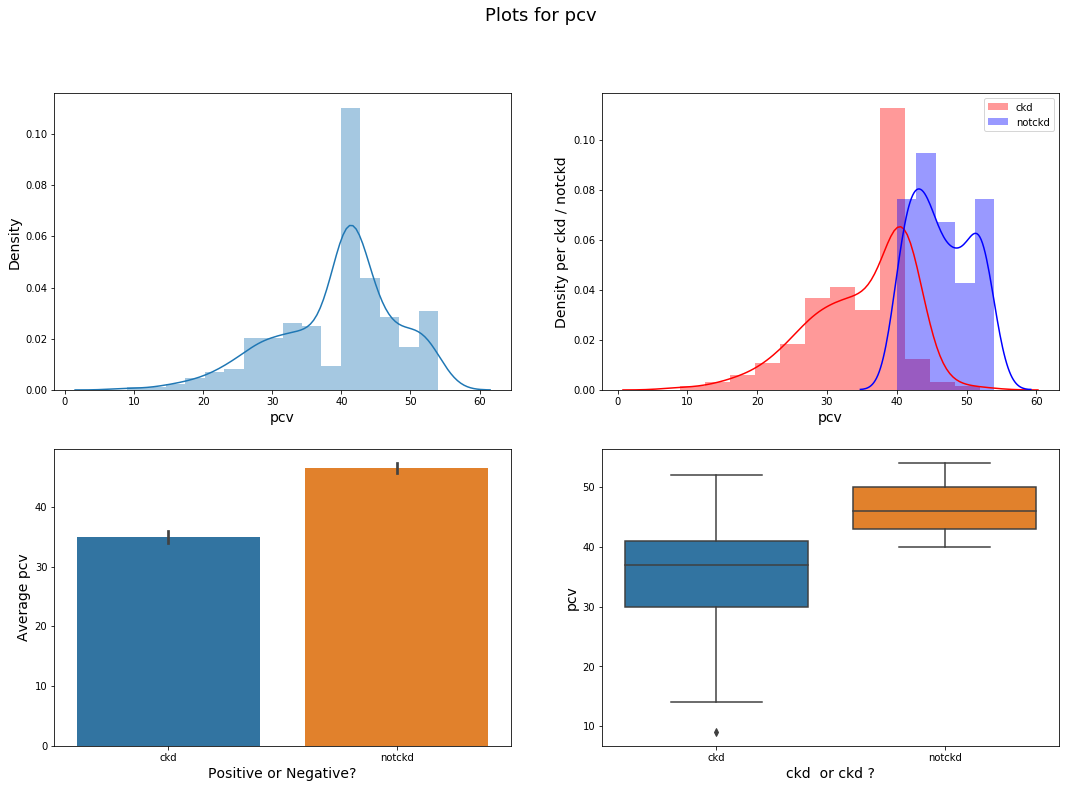

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


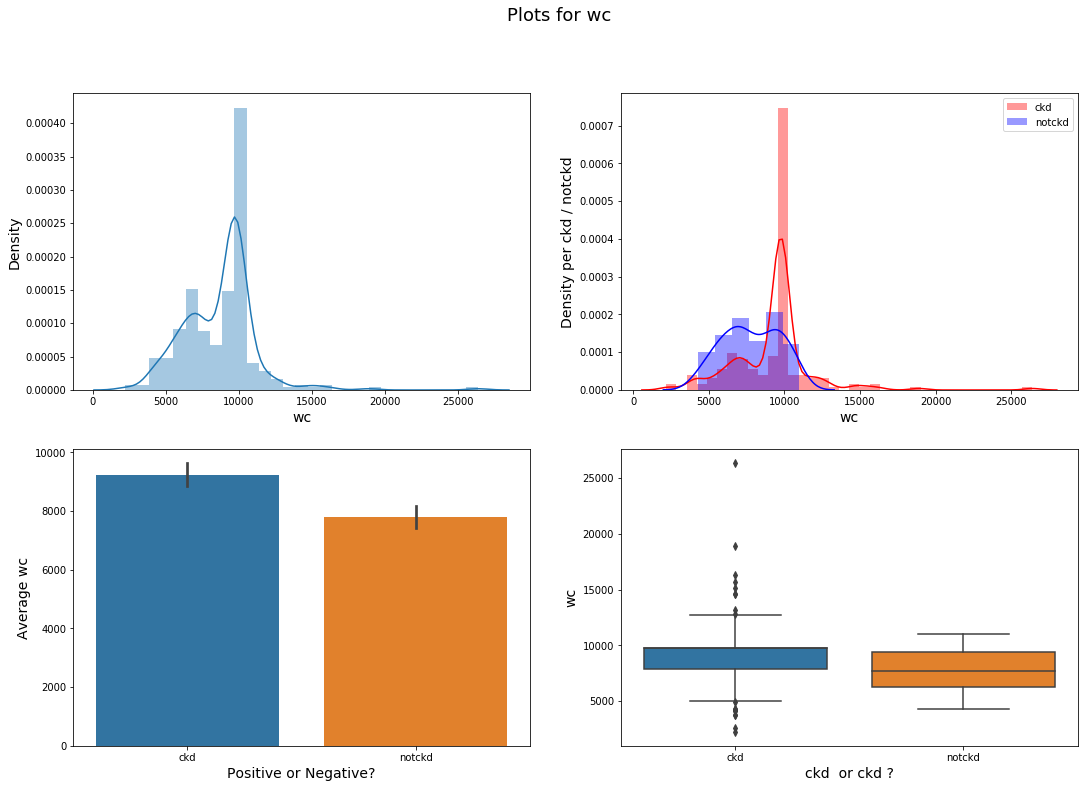

C:\Users\akhdi\OneDrive\Documents\MCE\ML\Projet_ML\projetml\functions.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label=str(classes[1]), ax=plt.subplot(222));


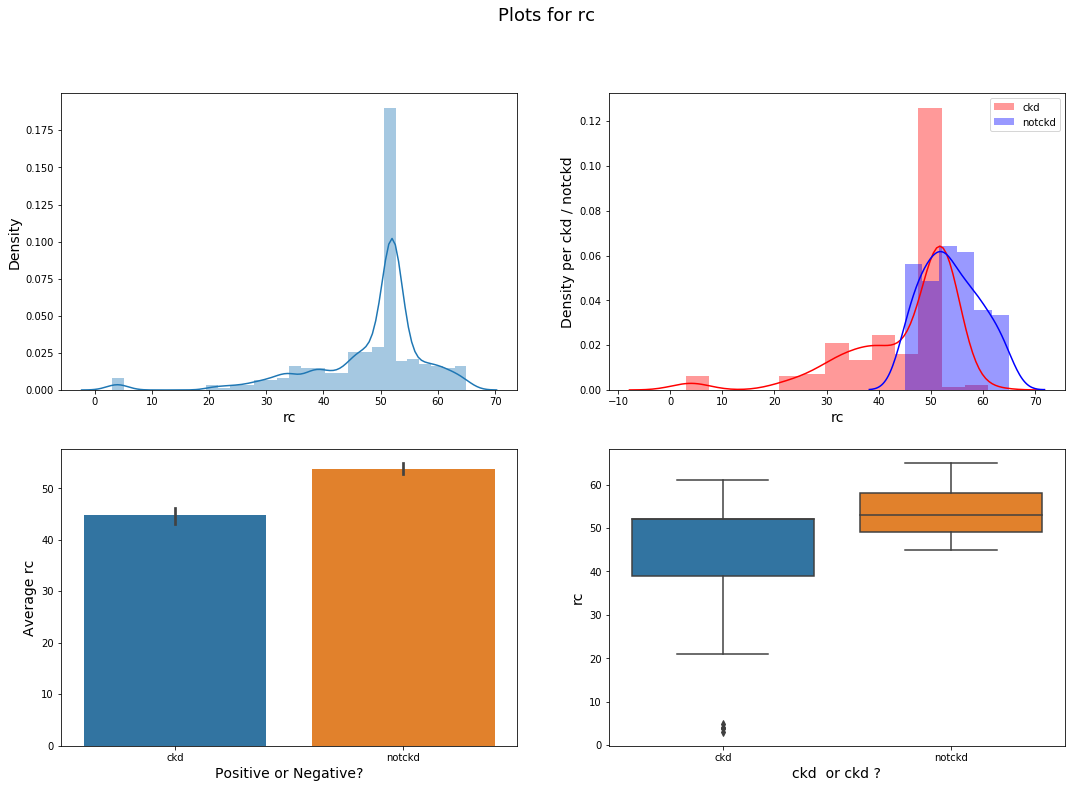

In [16]:
### Plotting Numeric Features



plot_numeric(train_data, numerical_features, 'classification')


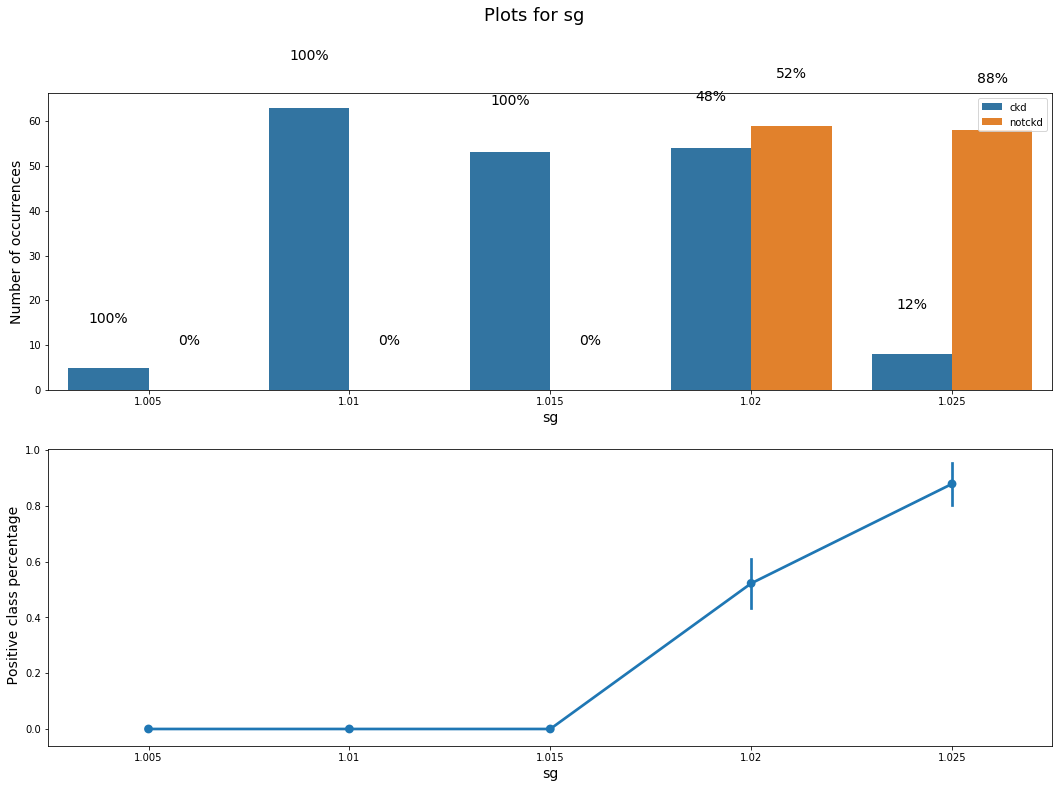

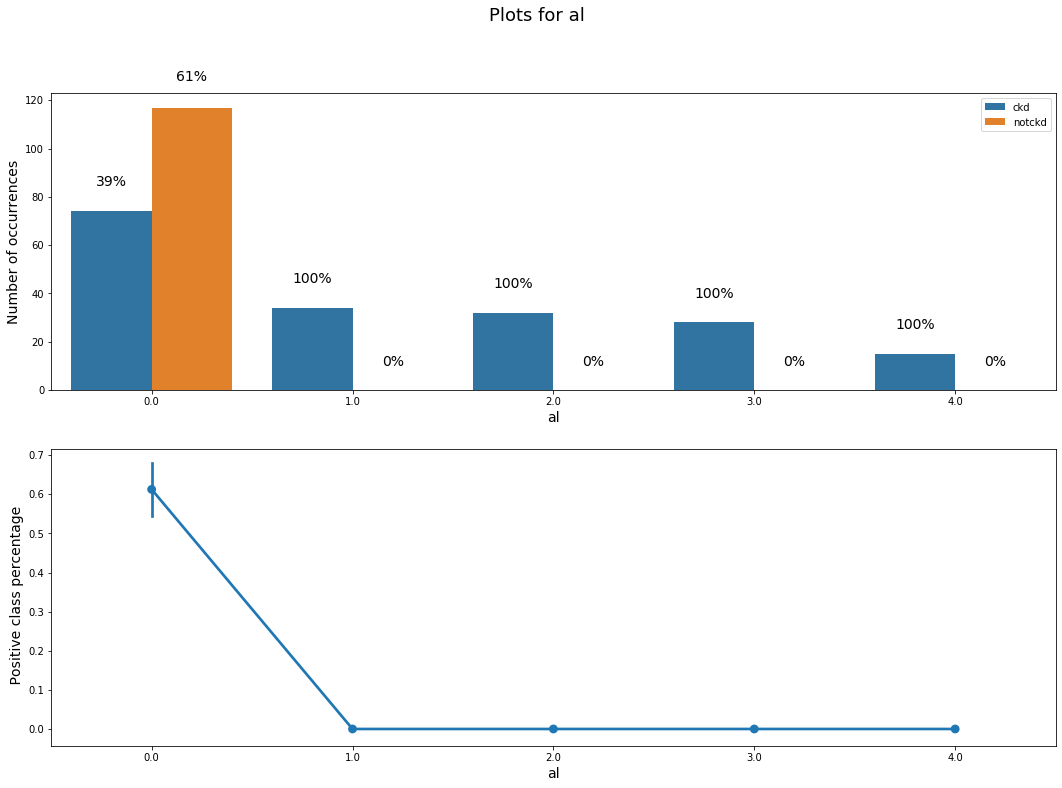

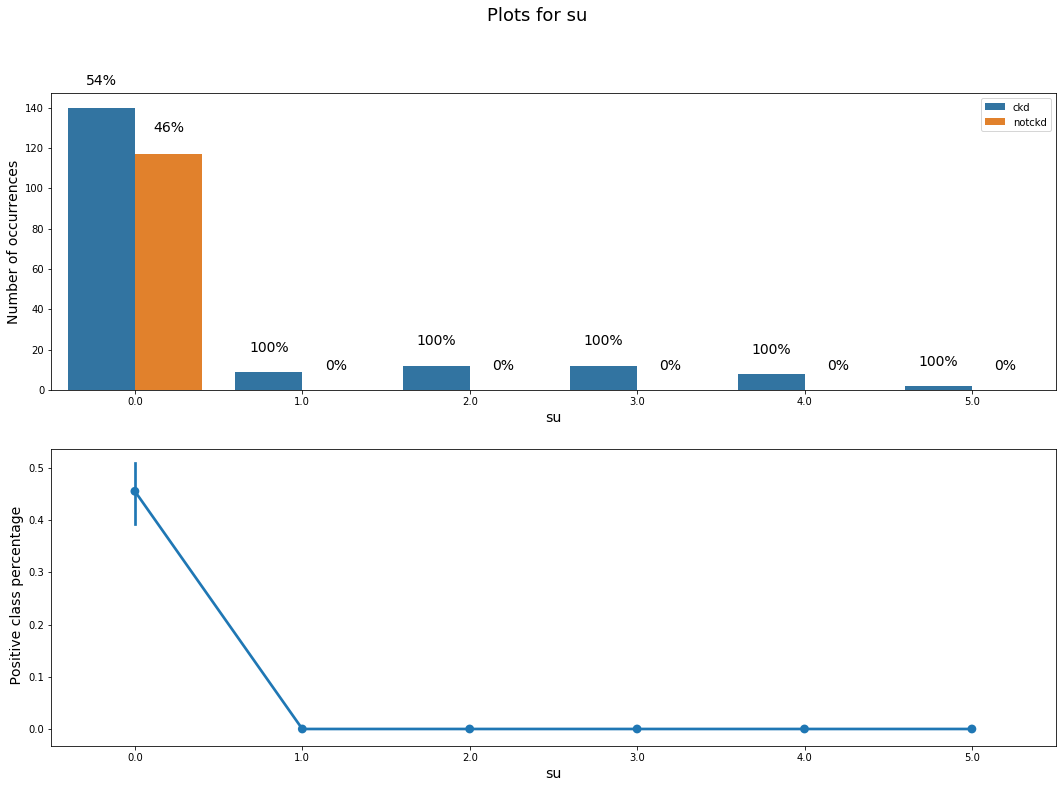

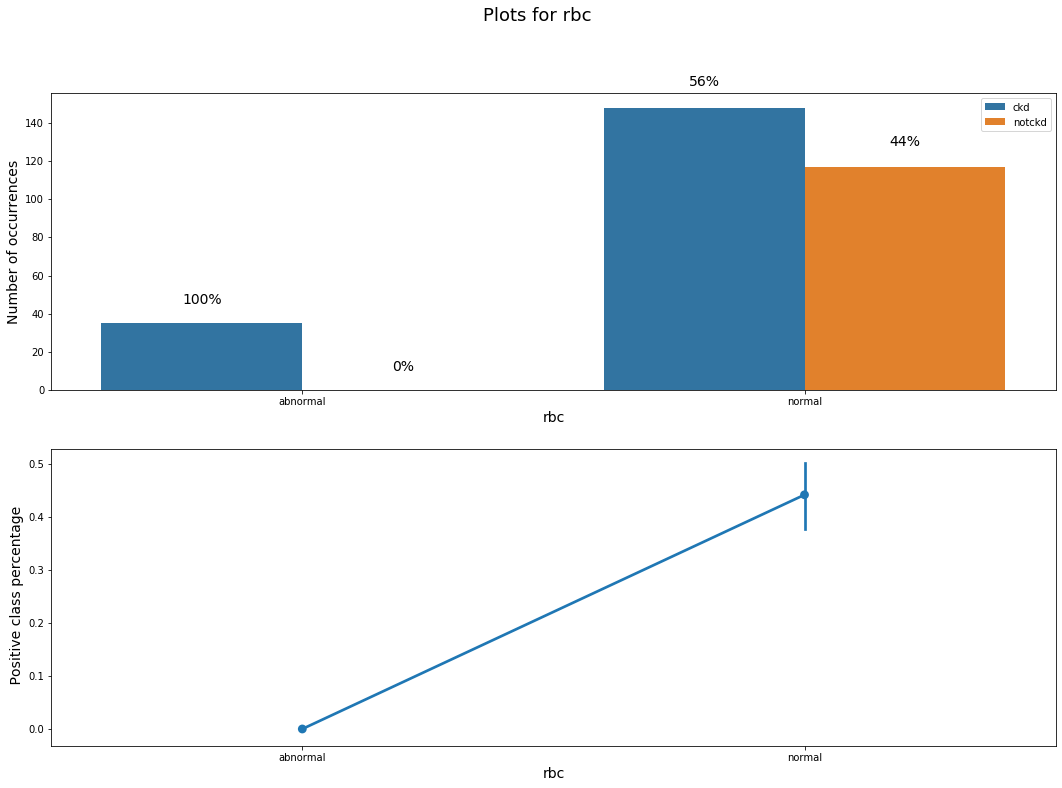

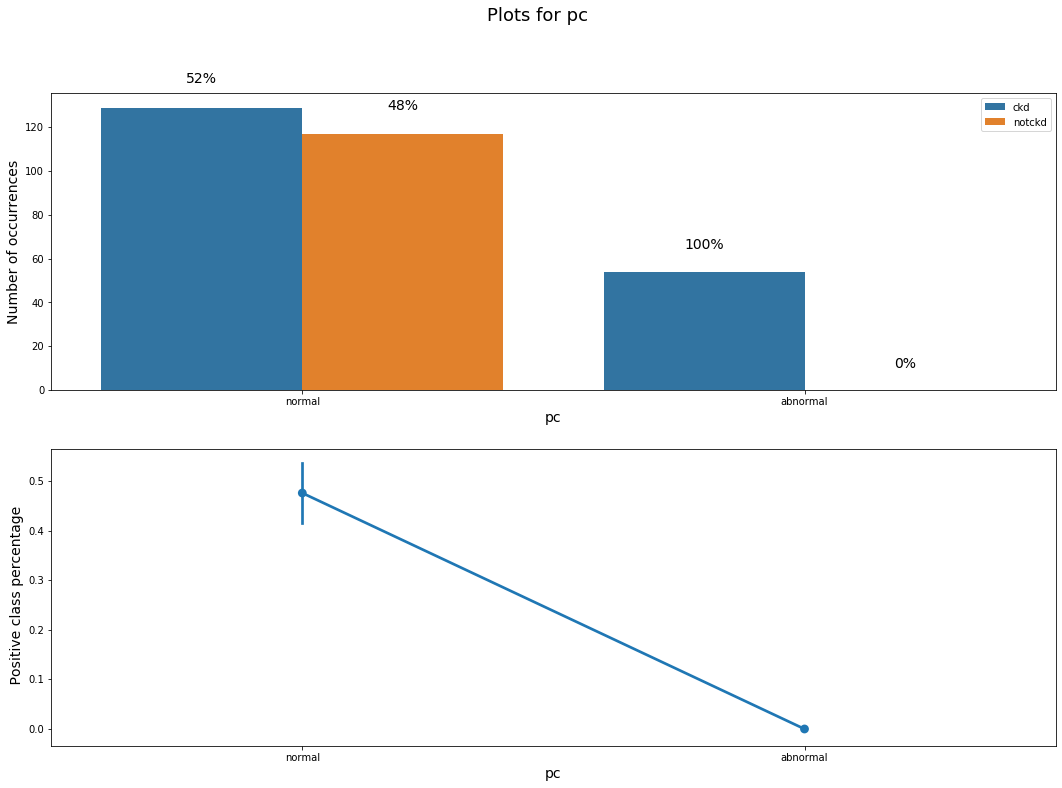

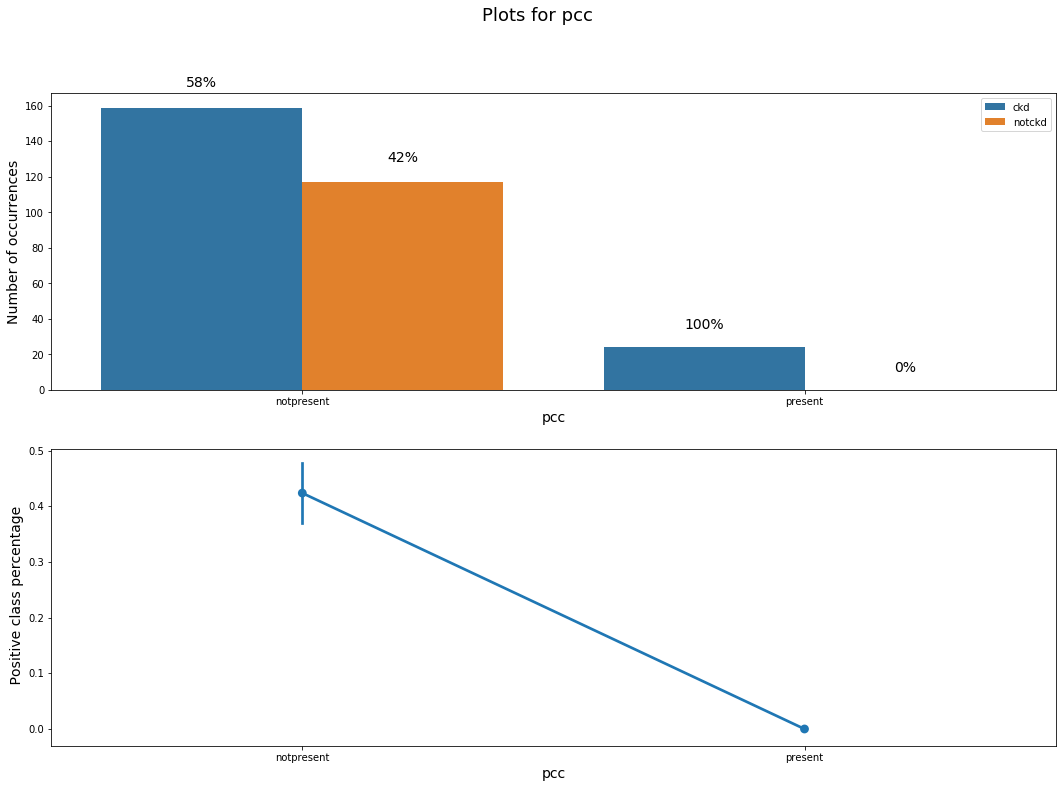

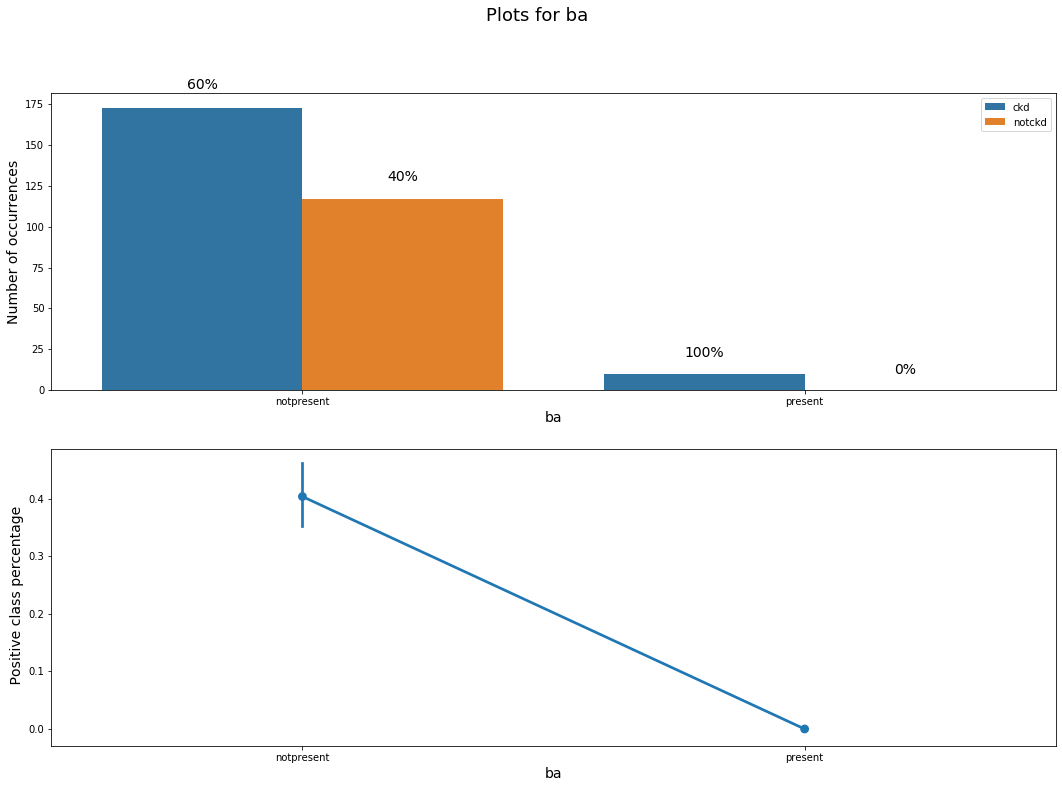

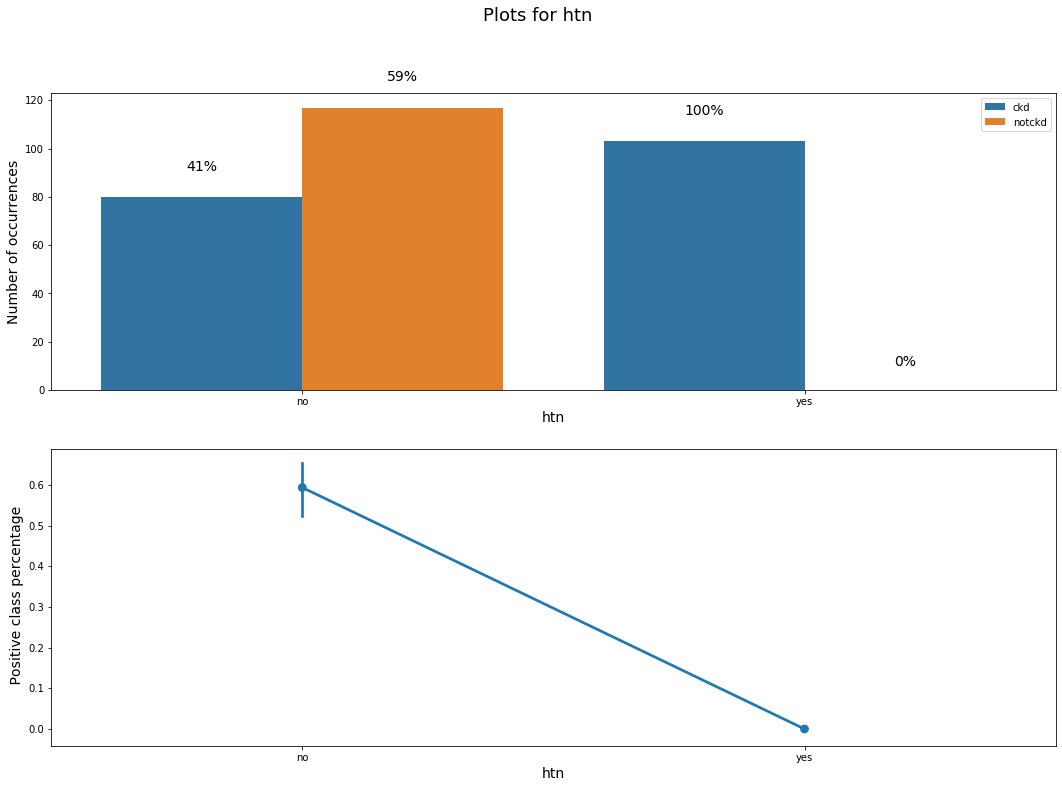

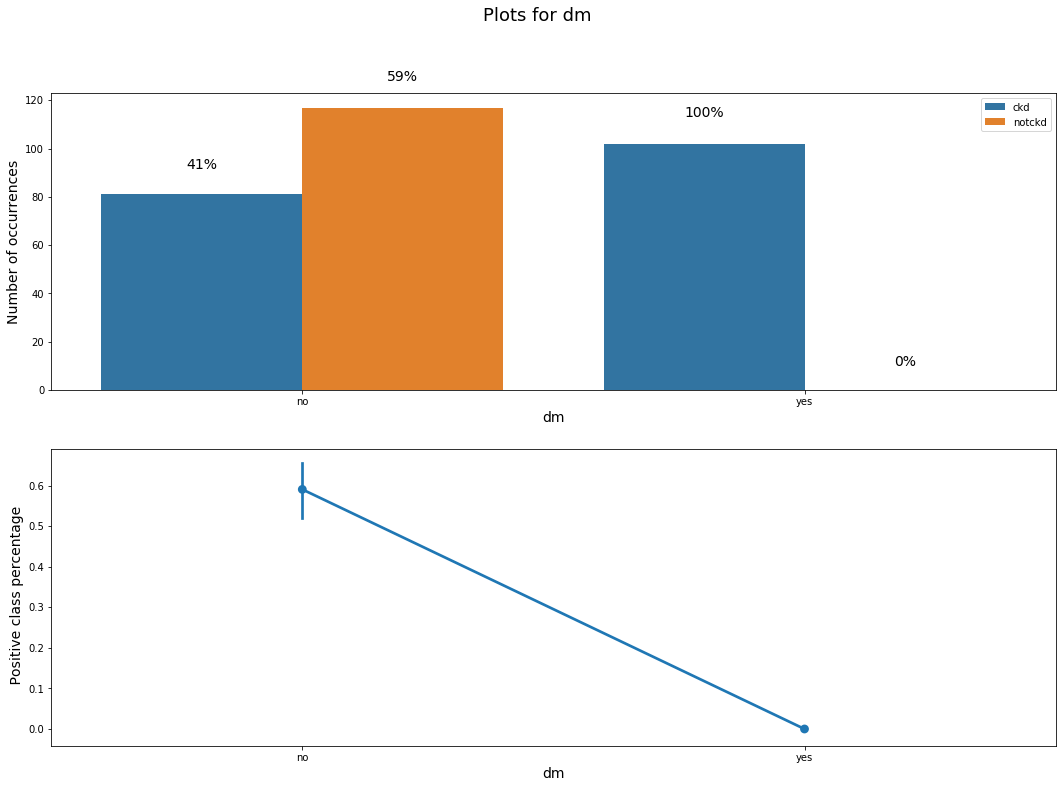

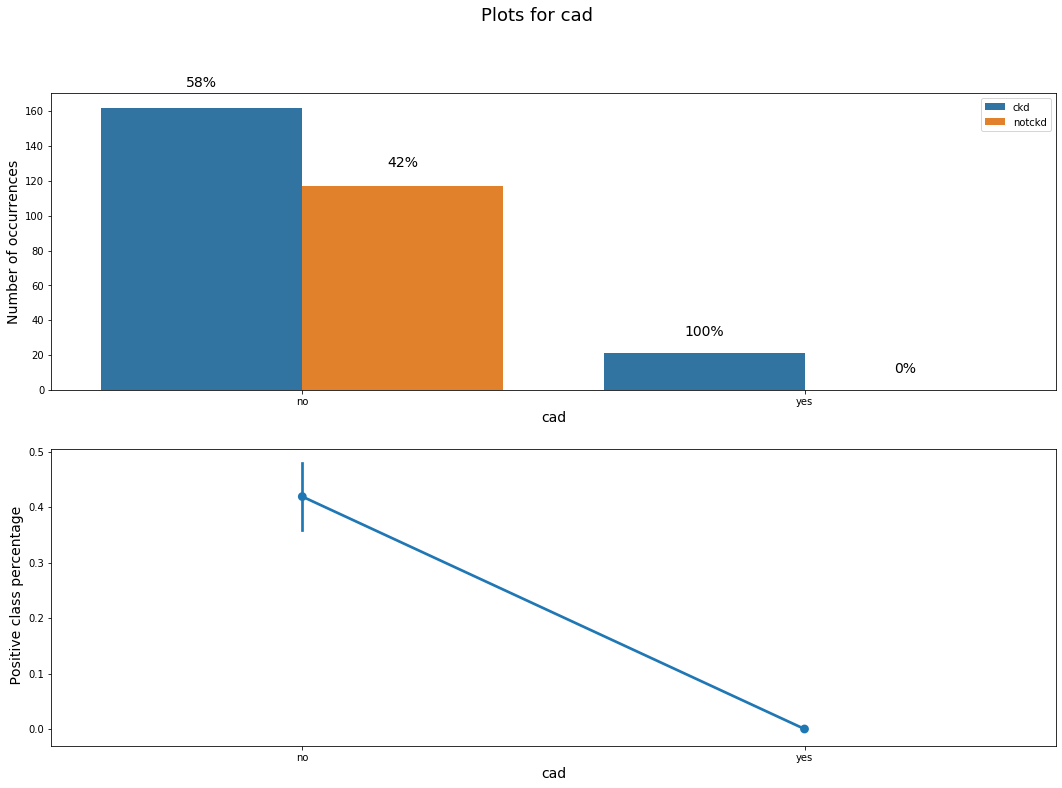

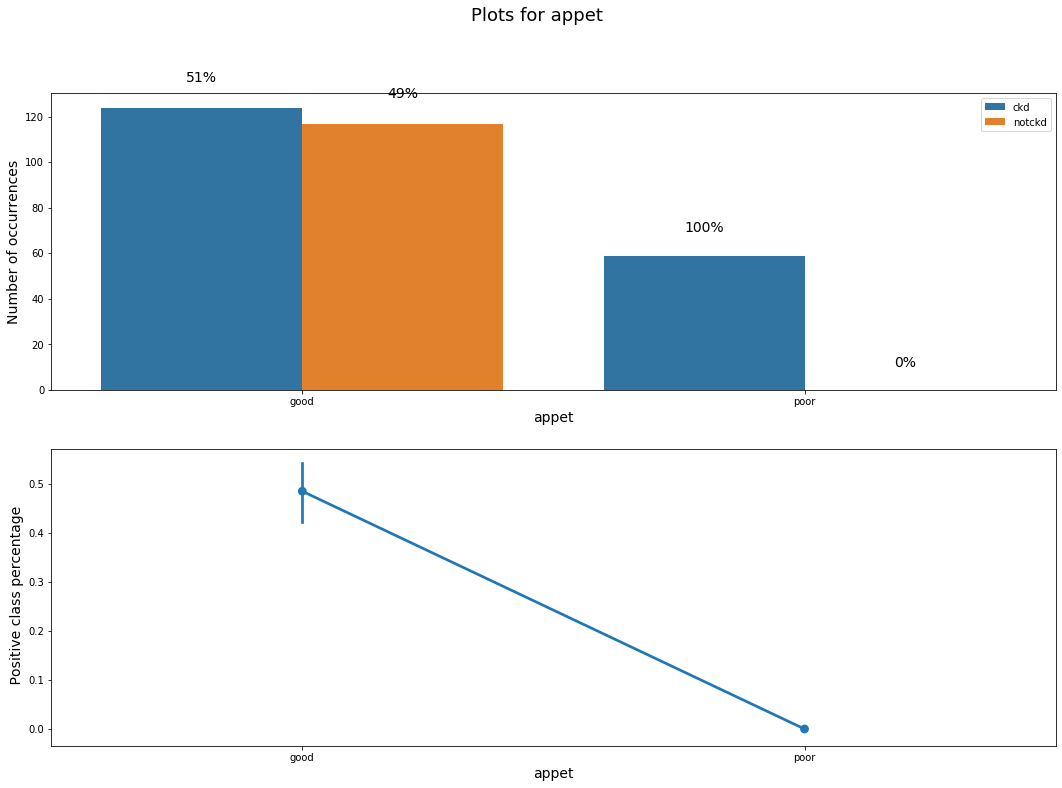

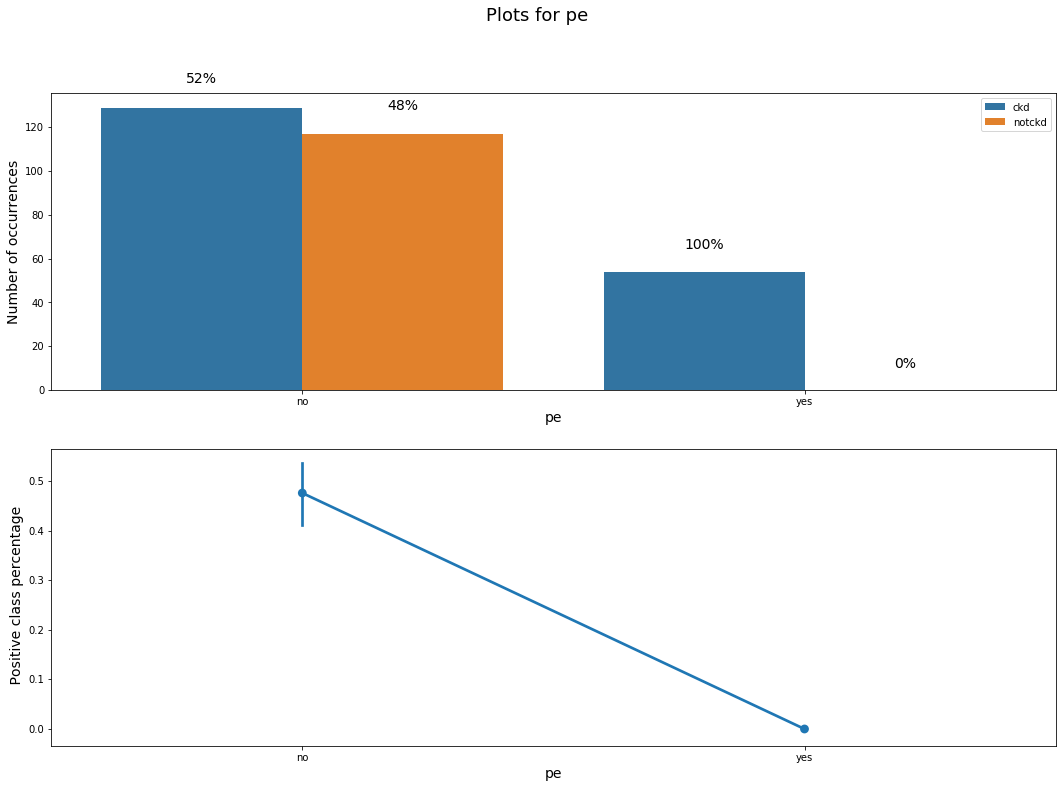

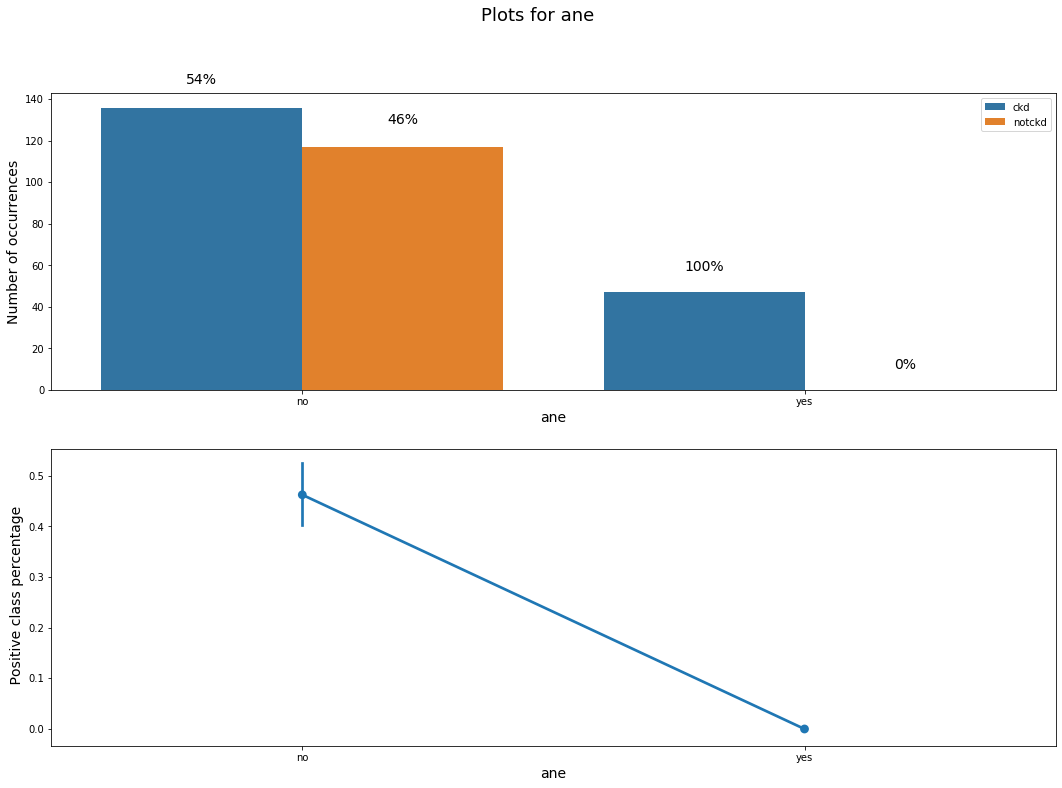

In [18]:
##### Plotting nominal Categorical Features        
plot_categ(train_data,"classification", categorical_features[:-2])# remove target columns

    - Induviduals having some features (eg "su" > 0, "ane"=yes, etc) are necessarly ill.

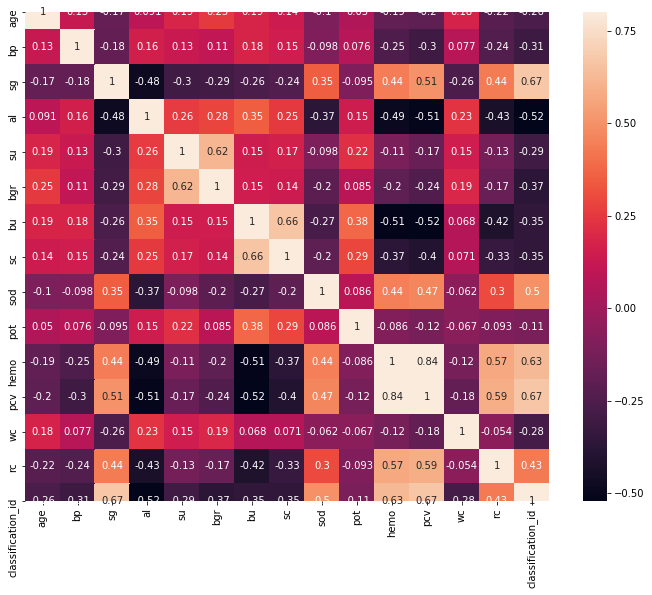

In [25]:


corr = train_data.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot=True, square=True);
plt.show()



As we have seen above in scatter plots, "hemo" and "pvc" are highly correlated

In [105]:
train_data = train_data.drop("pcv", axis=1)
numerical_features = [f for f in numerical_features if f!="pcv"]

In [106]:
# Encoding categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
def featureEng(numerical_features, categorical_features):
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    t =  ColumnTransformer([('Scaler', numeric_transformer, numerical_features),('OneHotEncod', categorical_transformer, categorical_features)])
    preproc = Pipeline(steps=[('preprocessor', t)])
    #print(t.get_feature_names())
    return t

transf_train = featureEng(numerical_features, categorical_features).fit(train_data)
X_train = transf_train.transform(train_data)
y_train = train_data['classification'].replace({'ckd':1,'notckd':0}).values

#### Feature Selection

In [107]:
## Corretation

from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest

ndiscrete = len(transf_train.transformers_[1][1].get_feature_names(categorical_features))
discreteCol = np.arange(len(X_train[0])-ndiscrete,len(X_train[0]))
discrete_mutual_info_classif = partial(mutual_info_classif, 
                                       discrete_features=discreteCol)
featS = SelectKBest(score_func=discrete_mutual_info_classif).fit(X_train,y_train )


In [108]:
columns_eng = numerical_features + transf_train.transformers_[1][1].get_feature_names(categorical_features).tolist()


In [110]:
from sklearn.ensemble import RandomForestClassifier

rfModel = RandomForestClassifier(random_state =0).fit(X_train, y_train)
order = np.flip(rfModel.feature_importances_.argsort())
{columns_eng[i] : [rfModel.feature_importances_[i],featS.scores_[i]] for i in order}


C:\Users\akhdi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'hemo': [0.1948919824066481, 0.418590810921623],
 'sc': [0.12653555096372074, 0.41505270919763837],
 'dm_yes': [0.09251183222967882, 0.23185498256644782],
 'sg_1.025': [0.06563367970777755, 0.14692167331647996],
 'htn_yes': [0.06198406277783519, 0.2630533077930446],
 'sg_1.01': [0.05705595047723716, 0.11783933589938617],
 'sod': [0.056867705391997925, 0.24863885577197387],
 'htn_no': [0.04418715119780122, 0.2630533077930446],
 'sg_1.015': [0.04169682912341498, 0.10503433825930042],
 'dm_no': [0.04102792817855027, 0.23185498256644782],
 'rc': [0.038417105818317226, 0.388537503910652],
 'bu': [0.03759052366326433, 0.16370997602148307],
 'bp': [0.017060263574506455, 0.1556782663167855],
 'al_0.0': [0.015656079576944978, 0.2565871067284259],
 'pe_no': [0.013975123689691536, 0.10713747951838526],
 'age': [0.013654843895635912, 0.0637843074061859],
 'pot': [0.012935100896650193, 0.0880823626170173],
 'al_1.0': [0.009412299211924578, 0.05604246674628305],
 'su_0.0': [0.0091576027607022, 0.07

In [111]:
order_rf = np.flip(rfModel.feature_importances_.argsort())
print([columns_eng[i]  for i in order_rf])
order_mi = np.flip(featS.scores_.argsort())
print([columns_eng[i]  for i in order_mi])

['hemo', 'sc', 'dm_yes', 'sg_1.025', 'htn_yes', 'sg_1.01', 'sod', 'htn_no', 'sg_1.015', 'dm_no', 'rc', 'bu', 'bp', 'al_0.0', 'pe_no', 'age', 'pot', 'al_1.0', 'su_0.0', 'pe_yes', 'sg_1.02', 'pc_abnormal', 'bgr', 'rbc_abnormal', 'appet_poor', 'pc_normal', 'al_3.0', 'wc', 'ane_no', 'al_2.0', 'appet_good', 'al_4.0', 'su_4.0', 'sg_1.005', 'ane_yes', 'al_5.0', 'su_1.0', 'su_3.0', 'su_5.0', 'rbc_normal', 'pcc_notpresent', 'pcc_present', 'ba_notpresent', 'ba_present', 'cad_no', 'cad_yes', 'su_2.0']
['hemo', 'sc', 'rc', 'htn_yes', 'htn_no', 'al_0.0', 'sod', 'dm_yes', 'dm_no', 'bgr', 'bu', 'bp', 'sg_1.025', 'wc', 'sg_1.01', 'appet_good', 'appet_poor', 'pe_no', 'pe_yes', 'sg_1.015', 'pc_normal', 'pc_abnormal', 'pot', 'ane_yes', 'ane_no', 'su_0.0', 'age', 'rbc_abnormal', 'rbc_normal', 'al_3.0', 'pcc_notpresent', 'al_1.0', 'pcc_present', 'al_2.0', 'cad_yes', 'cad_no', 'al_4.0', 'sg_1.02', 'ba_present', 'ba_notpresent', 'su_2.0', 'su_3.0', 'su_4.0', 'su_1.0', 'sg_1.005', 'al_5.0', 'su_5.0']


In [170]:
# PCA on numerical features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train[:,:len(numerical_features)])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y_train)], axis = 1)

In [169]:
len(numerical_features)

10

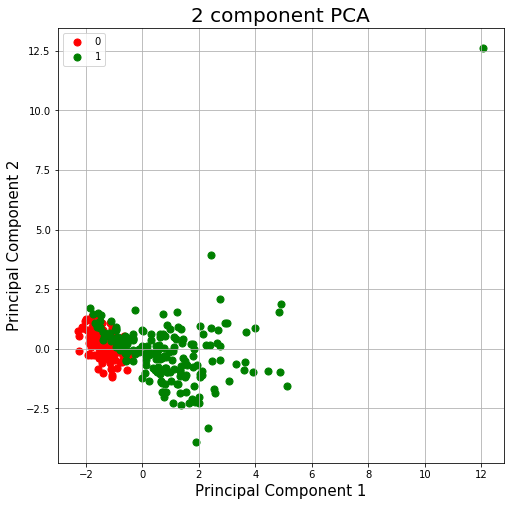

In [171]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [172]:
pca.explained_variance_ratio_

array([0.29222318, 0.13861931])

The explained variance is small since we convert a 10 dimentional space to a two dimensional space. 

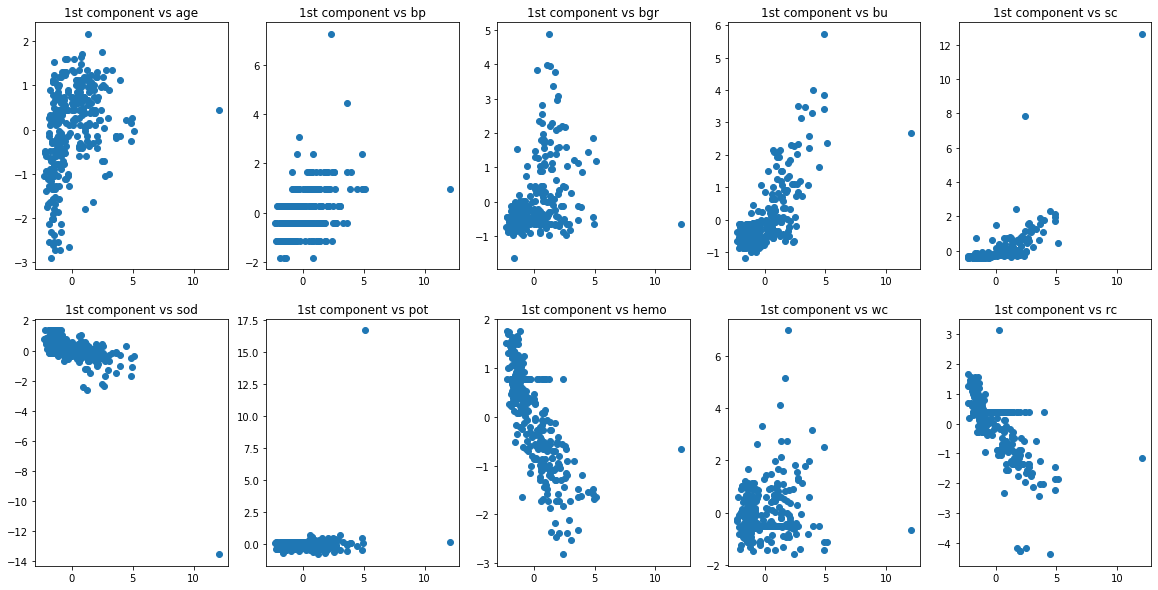

In [175]:
# P
n_axes = len(numerical_features)
_, axes = plt.subplots(ncols=5,nrows=2, figsize=(20,10))
col_id = 0
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try :
            axes[i][j].scatter(principalComponents[:,0], X_train[:,col_id])
            axes[i][j].set_title(f'1st component vs {columns_eng[col_id]}')
            col_id = col_id+1
        except :
            break

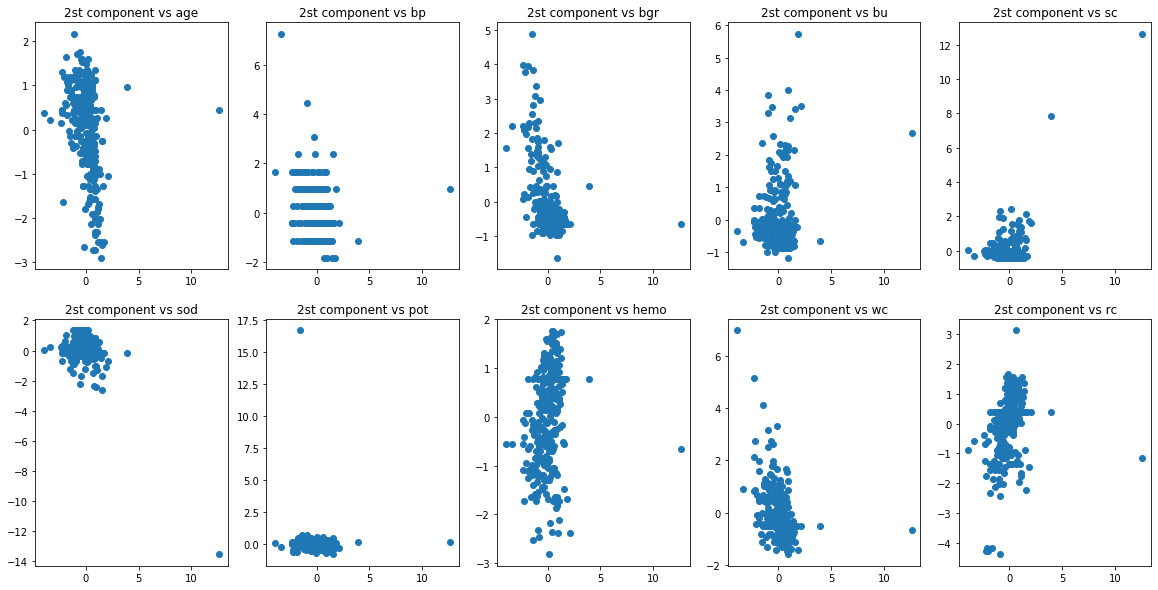

In [177]:
# P
n_axes = len(numerical_features)
_, axes = plt.subplots(ncols=5,nrows=2, figsize=(20,10))
col_id = 0
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try :
            axes[i][j].scatter(principalComponents[:,1], X_train[:,col_id])
            axes[i][j].set_title(f'2st component vs {columns_eng[col_id]}')
            col_id = col_id+1
        except :
            break

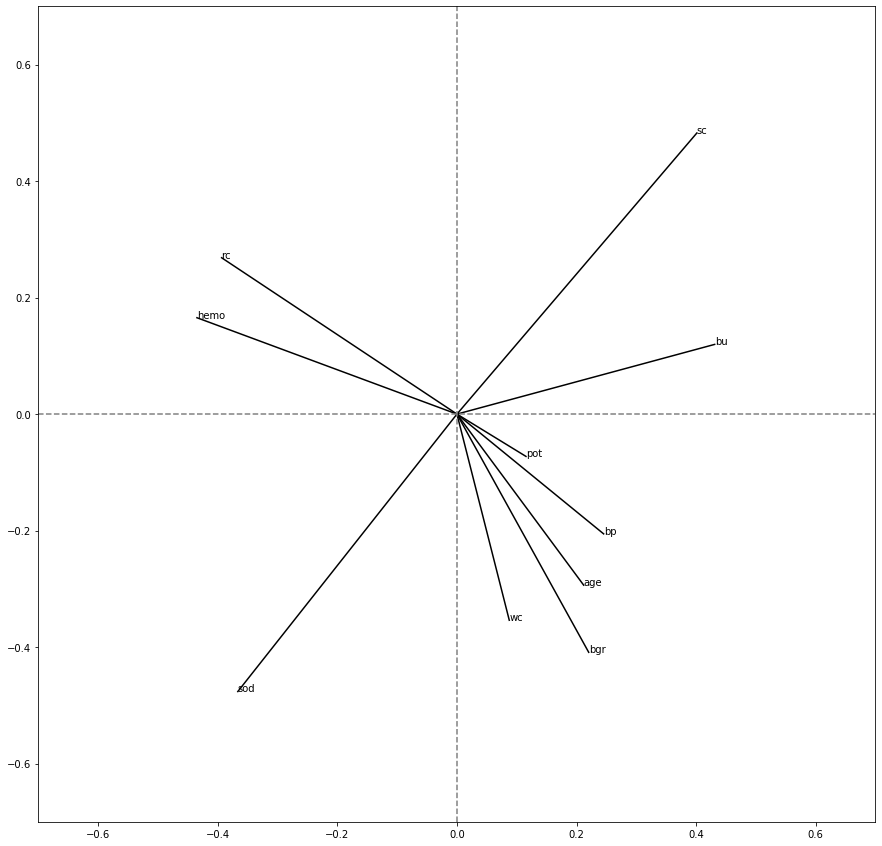

In [178]:
components = pca.components_
plt.figure(figsize=(15,15))
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, numerical_features[i])

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7);

In [59]:
def removeNonAlphanumeric(df) :
    for c in df.columns :
        if df[c].dtype == "O" :
            df[c] = df[c].str.replace('\t', '')
            df[c] = df[c].str.replace('[^a-zA-Z0-9]', '')
    df = df.replace('',np.nan)
    return df

def toNumeric(df):
    for c in df.columns :
        if df[c].dtype == "O" and all(df[c].str.isnumeric()):
            df[c] = pd.to_numeric(df[c])
    return df
            

<Figure size 432x288 with 0 Axes>

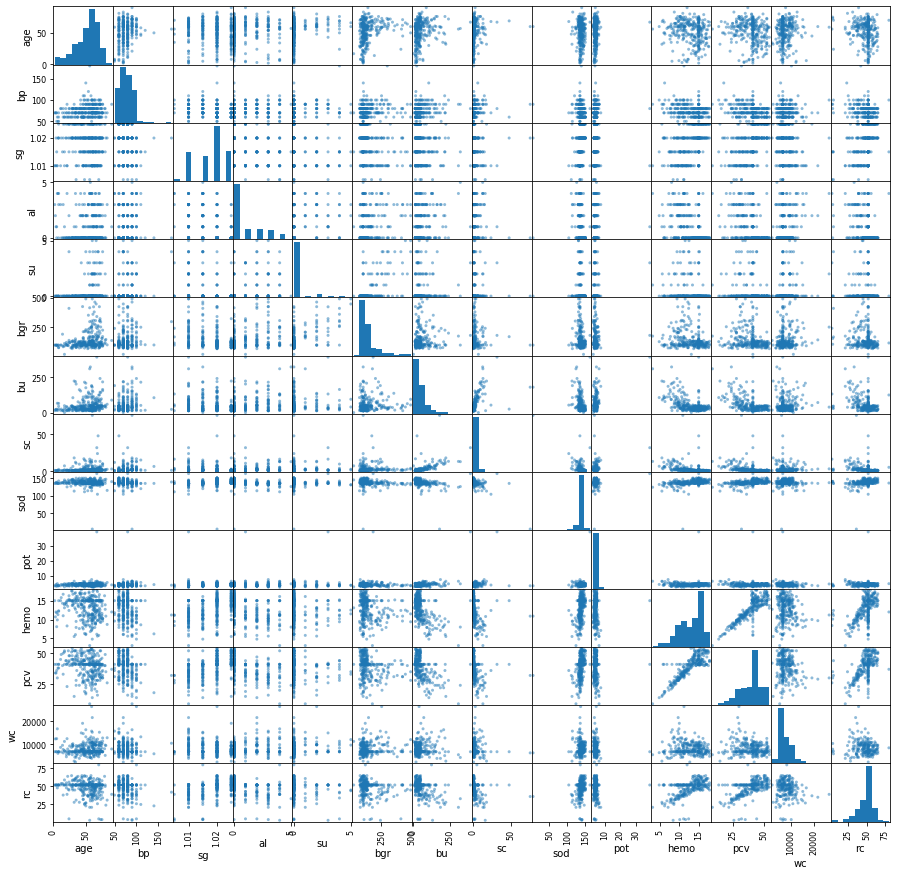

<Figure size 432x288 with 0 Axes>

In [82]:
pd.plotting.scatter_matrix(train_data,figsize=(15,15))
plt.show()